# In this notebook you will find......

## Importing libraries and data set

## Preparing data for a K-mean algorithm

## Running K-mean algorithm on my data set

## Import libraries and data set

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import pylab as pl

In [2]:
%matplotlib inline

In [3]:
path = r"C:\Users\Carter\Documents\Data Immersion\Advanced Analytics and Dashboard Design\NY Airbnb Self-Project"

In [4]:
# Import data set
df_airbnb = pd.read_csv(os.path.join(path, '02 Data','Prepared Data','airbnb_ny_clean.csv'))

In [5]:
df_airbnb.head()

,Unnamed: 0,Unnamed: 0.1,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,0,112,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,1,1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,2,2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,112,NaN,NaN,1,365
3,3,3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,4,4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,112


## Preparing data for K-mean algorithm

In [6]:
df_airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      48895 non-null  int64  
 1   Unnamed: 0.1                    48895 non-null  int64  
 2   id                              48895 non-null  int64  
 3   name                            48879 non-null  object 
 4   host_id                         48895 non-null  int64  
 5   host_name                       48874 non-null  object 
 6   neighbourhood_group             48895 non-null  object 
 7   neighbourhood                   48895 non-null  object 
 8   latitude                        48895 non-null  float64
 9   longitude                       48895 non-null  float64
 10  room_type                       48895 non-null  object 
 11  price                           48895 non-null  int64  
 12  minimum_nights                  

In [7]:
# Get basic stats of data set for any necessary cleaning
df_airbnb.describe()

,Unnamed: 0,Unnamed: 0.1,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,24447.000000,24447.002291,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.745884,7.029962,46.299806,1.373221,7.143982,152.942816
std,14114.915043,14114.911084,1.098311e+07,7.861097e+07,0.054530,0.046157,240.144020,20.510550,54.420963,1.680442,32.952519,105.595976
min,0.000000,1.000000,2.539000e+03,2.438000e+03,40.499790,-74.244420,10.000000,1.000000,1.000000,0.010000,1.000000,1.000000
25%,12223.500000,12223.500000,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,4.000000,0.190000,1.000000,100.000000
50%,24447.000000,24447.000000,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,18.000000,0.720000,1.000000,112.000000
75%,36670.500000,36670.500000,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,112.000000,2.020000,2.000000,227.000000
max,48894.000000,48894.000000,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


Taking a closer look, I notice that there are some Airbnbs that have a price of 0 and 0 availibility. This is something I didn't notice before that I'll look into.

In [ ]:
# Get value count of availability

In [9]:
# Create subset of data where price and availbility is equal to 0
zero_price = df_airbnb[df_airbnb['price'] == 0]
zero_availability = df_airbnb[df_airbnb['availability_365'] == 0]

### Zero price

In [10]:
zero_price

,Unnamed: 0,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
23161,23161,18750597,"Huge Brooklyn Brownstone Living, Close to it all.",8993084,Kimberly,Brooklyn,Bedford-Stuyvesant,40.69023,-73.95428,Private room,0,4,1,2018-01-06,0.05,4,28
25433,25433,20333471,★Hostel Style Room | Ideal Traveling Buddies★,131697576,Anisha,Bronx,East Morrisania,40.83296,-73.88668,Private room,0,2,55,2019-06-24,2.56,4,127
25634,25634,20523843,"MARTIAL LOFT 3: REDEMPTION (upstairs, 2nd room)",15787004,Martial Loft,Brooklyn,Bushwick,40.69467,-73.92433,Private room,0,2,16,2019-05-18,0.71,5,0
25753,25753,20608117,"Sunny, Quiet Room in Greenpoint",1641537,Lauren,Brooklyn,Greenpoint,40.72462,-73.94072,Private room,0,2,12,2017-10-27,0.53,2,0
25778,25778,20624541,Modern apartment in the heart of Williamsburg,10132166,Aymeric,Brooklyn,Williamsburg,40.70838,-73.94645,Entire home/apt,0,5,3,2018-01-02,0.15,1,73
25794,25794,20639628,Spacious comfortable master bedroom with nice ...,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68173,-73.91342,Private room,0,1,93,2019-06-15,4.28,6,176
25795,25795,20639792,Contemporary bedroom in brownstone with nice view,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68279,-73.91170,Private room,0,1,95,2019-06-21,4.37,6,232
25796,25796,20639914,Cozy yet spacious private brownstone bedroom,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68258,-73.91284,Private room,0,1,95,2019-06-23,4.35,6,222
26259,26259,20933849,the best you can find,13709292,Qiuchi,Manhattan,Murray Hill,40.75091,-73.97597,Entire home/apt,0,3,0,NaN,NaN,1,0
26841,26841,21291569,Coliving in Brooklyn! Modern design / Shared room,101970559,Sergii,Brooklyn,Bushwick,40.69211,-73.90670,Shared room,0,30,2,2019-06-22,0.11,6,333


In [23]:
zero_price.shape

(11, 17)

I think I will delete these listings because 1) it's going to be hard to impute price since each listing is a different room type and from what I know of Airbnb, a room has a totally different price than a home. So if I impute the mean it coudl skew the results too much 2) It's only 11 entries out of 48,000 so it won't skew my data too much. 

In [30]:
# Drop the rows where price = 0
df_airbnb_clean = df_airbnb[df_airbnb['price'] > 0]

In [28]:
df_airbnb_clean.shape

(48895, 17)

In [31]:
df_airbnb_clean['price'].min()

10

In [11]:
zero_availability

,Unnamed: 0,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
4,4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
6,6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
8,8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
14,14,6090,West Village Nest - Superhost,11975,Alina,Manhattan,West Village,40.73530,-74.00525,Entire home/apt,120,90,27,2018-10-31,0.22,1,0
20,20,7801,Sweet and Spacious Brooklyn Loft,21207,Chaya,Brooklyn,Williamsburg,40.71842,-73.95718,Entire home/apt,299,3,9,2011-12-28,0.07,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48550,48550,36313048,Sunny room with private entrance in shared home,16883913,Tiffany,Queens,Ridgewood,40.69919,-73.89902,Private room,45,1,0,NaN,NaN,1,0
48731,48731,36410519,Sunlight charming apt. in the heart of Brooklyn,121384174,Luciana Paula,Brooklyn,Park Slope,40.66716,-73.98101,Entire home/apt,111,8,0,NaN,NaN,1,0
48756,48756,36419441,Murray Hill Masterpiece,273824202,David,Manhattan,Murray Hill,40.74404,-73.97239,Entire home/apt,129,2,0,NaN,NaN,1,0
48760,48760,36420725,"Sunnyside, Queens 15 Mins to Midtown Clean & C...",19990280,Brandon,Queens,Sunnyside,40.74719,-73.91919,Private room,46,1,0,NaN,NaN,1,0


I did some research into this from the forums on Kaggle and the 0 avaiblability is most likely due to the host temporarily closing the listing due to renovations and such. To fix this problem and prevent it from skewing my results, I will figure out the median of the column and inpute that or the mean into those values.

In [13]:
# Find the median of availability column
df_airbnb['availability_365'].median()

45.0

In [14]:
# Find the mean of the availability column
df_airbnb['availability_365'].mean()

112.78132733408324

In [17]:
# Replace 0 availability to 112
df_airbnb.replace(to_replace = 0, value = 112, inplace = True)

In [18]:
df_airbnb['availability_365'].min()

1

In [32]:
# Export the cleaned data set
df_airbnb_clean.to_csv(os.path.join(path, '02 Data','Prepared Data','airbnb_ny_clean.csv'))

### Create subset of data

In [5]:
# Create subset with just numerical data
df_prepped = df_airbnb[['price','minimum_nights','number_of_reviews','calculated_host_listings_count','availability_365']]

In [6]:
df_prepped.head()

,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,149,1,9,6,365
1,225,1,45,2,355
2,150,3,112,1,365
3,89,1,270,1,194
4,80,10,9,1,112


In [7]:
df_prepped.describe()

,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,152.745884,7.029962,46.299806,7.143982,152.942816
std,240.144020,20.510550,54.420963,32.952519,105.595976
min,10.000000,1.000000,1.000000,1.000000,1.000000
25%,69.000000,1.000000,4.000000,1.000000,100.000000
50%,106.000000,3.000000,18.000000,1.000000,112.000000
75%,175.000000,5.000000,112.000000,2.000000,227.000000
max,10000.000000,1250.000000,629.000000,327.000000,365.000000


In [11]:
for col in df_prepped.columns.tolist():
    werid = (df_prepped[[col]].applymap(type) != df_prepped[[col]].iloc[0].apply(type)).any(axis = 1)
    if len (df_prepped[werid]) > 0:
        print(col)

I will need to standardize the values since the range of the columns are different. For example, thje range of the price is closeto 9000 and the range of reviews per month are 58.

In [18]:
# Create data set with listings that have an availability 365 
df_prepped_1 = df_prepped[df_prepped['minimum_nights'] <= 365]

### Standardizing the columns

In [19]:
# Create scaler object and fit it into dataframe
scaler = StandardScaler()
segmentation_std = scaler.fit_transform(df_prepped)

In [20]:
# Fit standardized data into PCA
pca = PCA()
pca.fit(segmentation_std)

PCA()

In [21]:
# Attribute whos how much variance is explained by each of the 5 different components
pca.explained_variance_ratio_

array([0.27590179, 0.19765628, 0.19355618, 0.17751782, 0.15536793])

Text(0, 0.5, 'Cumulative Explained Variance')

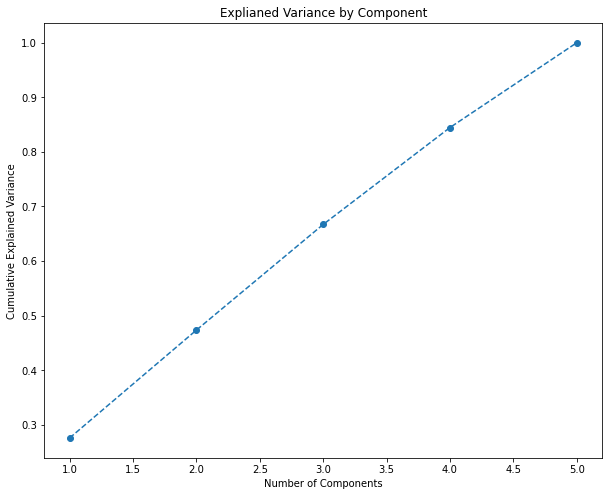

In [22]:
# Plot the variance ration
plt.figure(figsize = (10,8))
plt.plot(range(1,6), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title('Explianed Variance by Component')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

Following the rule of thumb to leave 80% variance, we will keep 4 components.

In [23]:
# Choose four components.
pca = PCA(n_components = 4)

In [24]:
# Fit model and data with our selected number of components
pca.fit(df_prepped_1)

PCA(n_components=4)

In [25]:
pca.transform(df_prepped_1)

array([[   4.68807871, -208.49113845,  -50.65881317,  -16.73828907],
       [  80.45520164, -197.27164513,  -14.55536019,  -20.97649901],
       [   6.46816755, -214.51623678,   52.07336118,  -23.18301893],
       ...,
       [ -42.43668221,  119.87559485,   73.68993686,    2.66065732],
       [-103.40590659,  142.04845896,   75.61850371,    9.05001688],
       [ -67.59037404,  122.86796845,   74.06718479,    2.84200729]])

In [26]:
scores_pca = pca.transform(df_prepped_1)

### Elbow 

## K-means Clustering

In [27]:
# Find the number of clusters we can have in K-Means cluster
num_cl = range(1,10) # Defines range of potential clusters
kmeans = [KMeans(n_clusters=i) for i in num_cl]

In [28]:
# Create a score to find our 'elbow'
score = [kmeans[i].fit(scores_pca).score(scores_pca) for i in range(len(kmeans))]

score

[-3562783959.128208,
 -2111217319.3958468,
 -1552622074.5306962,
 -1120499201.827155,
 -835998067.1201915,
 -700084170.9529425,
 -610193195.0640321,
 -542601312.5589234,
 -483013741.61464334]

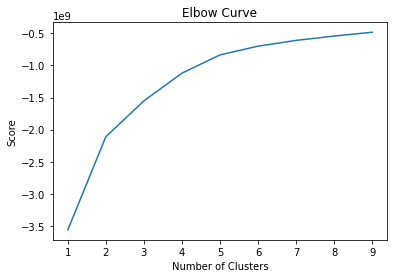

In [29]:
# Plot our elbow curve

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

I can see the curve starts to flatten out at 5 clusters, so the optimal amount of clusters should be5.

In [30]:
# Create k-means object
k_means = KMeans(n_clusters = 5, n_jobs = -1)

In [69]:
# Fit K-means object into our transformed data
k_means.fit(scores_pca)

D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=5, n_jobs=-1)

In [31]:
# Create columnn for clsuters
df_prepped_1['clusters'] = k_means.fit_predict(scores_pca)

D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
<ipython-input-31-7a699ebd12a1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_prepped_1['clusters'] = k_means.fit_predict(scores_pca)


In [32]:
df_prepped_1.head()

,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,clusters
0,149,1,9,6,365,2
1,225,1,45,2,355,2
2,150,3,112,1,365,2
3,89,1,270,1,194,2
4,80,10,9,1,112,0


In [33]:
df_prepped_1['clusters'].value_counts(dropna = False)

0    33688
2    12181
4     2838
3      148
1       26
Name: clusters, dtype: int64

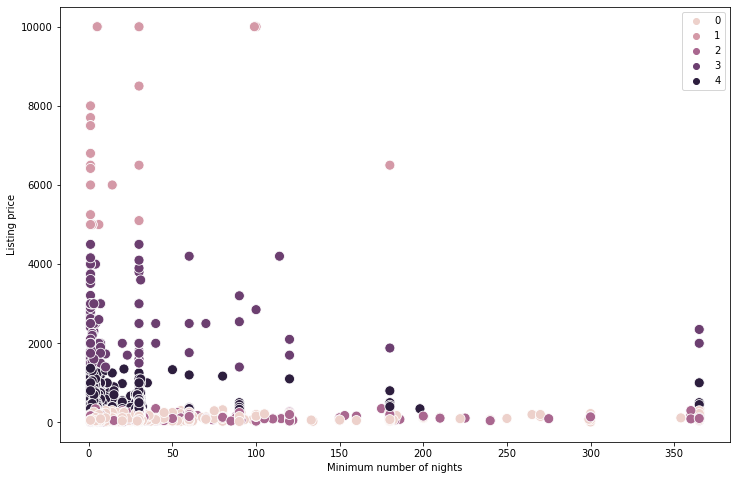

In [34]:
# Plot clusters for 'minimum_nights' and 'price'
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_prepped_1['minimum_nights'], y = df_prepped_1['price'], hue=k_means.labels_, s = 100)

ax.grid(False)
plt.xlabel('Minimum number of nights')
plt.ylabel('Listing price')
plt.show()

From this, I see that in group 1 the listing prices are quite high and do not have an availability over 170ish nights. Where as

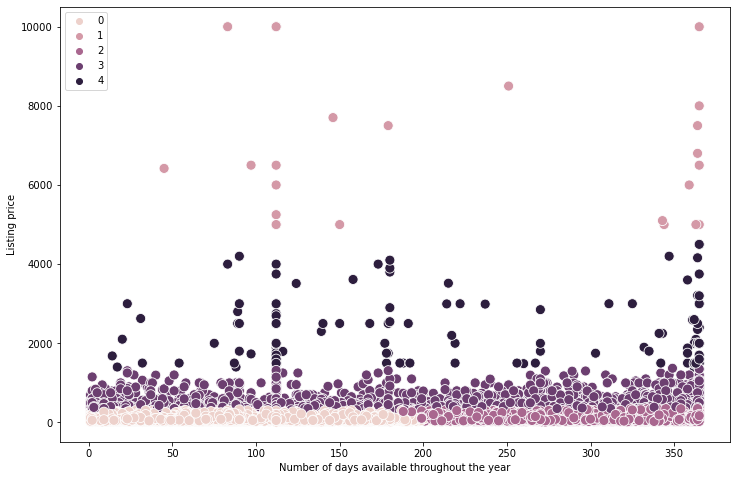

In [76]:
# Plot clusters for 'availability' and 'price'
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_prepped_1['availability_365'], y =df_prepped_1['price'], hue=k_means.labels_, s = 100)

ax.grid(False)
plt.xlabel('Number of days available throughout the year')
plt.ylabel('Listing price')
plt.show()

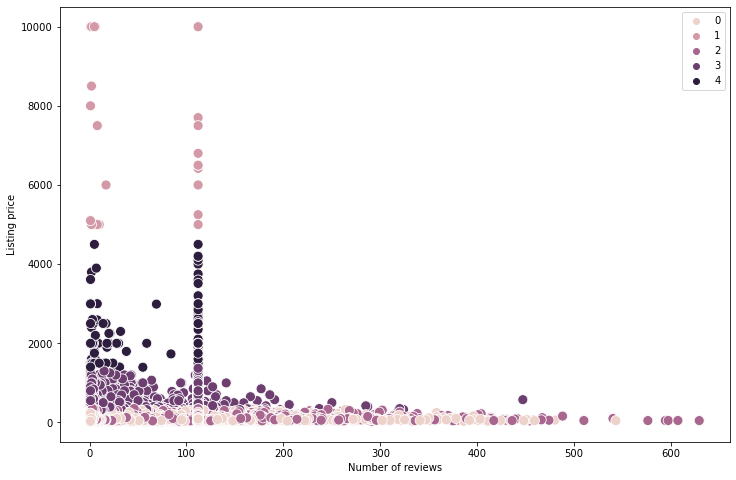

In [75]:
# Plot clusters for 'number_of_reviews' and 'price'
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_prepped_1['number_of_reviews'], y =df_prepped_1['price'], hue=k_means.labels_, s = 100)

ax.grid(False)
plt.xlabel('Number of reviews')
plt.ylabel('Listing price')
plt.show()

In [95]:
df_prepped_1.groupby('clusters').agg({'price':['mean','median'],
                                  'minimum_nights':['mean','median'],  
                                  'number_of_reviews':['mean','median'],
                                  'calculated_host_listings_count':['mean','median'],
                                  'availability_365':['mean','median']})

price        minimum_nights        number_of_reviews         \
                 mean median           mean median              mean median   
clusters                                                                      
0          116.224175    100       5.271254      2         41.753859   14.0   
1         7087.269231   6500      22.115385      2         54.346154   13.5   
2          129.883242    110      10.938090      3         57.485426   32.0   
3          511.525352    450       7.072887      3         50.697887   23.0   
4         2245.777027   2000      19.675676      2         72.601351  112.0   

         calculated_host_listings_count        availability_365         
                                   mean median             mean median  
clusters                                                                
0                              2.398302      1        94.487533  112.0  
1                              2.538462      1       212.576923  148.0  
2                             18.467526      2       306.678791  318.0  
3                             15.175352      1       182.740493  147.0  
4                              2.783784      1       212.283784  179.5

## Data set without Outliers

In [35]:
# Create subset without listings with a price over $3000 or availability over 365
df_prepped_2 = df_prepped_1[df_prepped_1['price'] <= 3000]

### Standardize the columns

In [45]:
# Fit PCA into the new data set
pca.fit(df_prepped_2)

PCA(n_components=4)

In [46]:
pca.transform(df_prepped_2)

array([[  25.46119631, -207.07764787,  -50.47011674,  -16.57476342],
       [ 100.27074991, -190.00572822,  -14.75521836,  -21.51802387],
       [  28.14485423, -212.80899465,   52.2646581 ,  -22.93135007],
       ...,
       [ -46.0623559 ,  116.91323449,   73.72882566,    2.85058822],
       [-108.48346979,  134.33741219,   75.93217705,    9.7832922 ],
       [ -71.36567376,  117.95839287,   74.22866068,    3.26602339]])

In [47]:
score_pca_1 = pca.transform(df_prepped_2)

In [48]:
# Create a score to find our 'elbow'
score_1 = [kmeans[i].fit(score_pca_1).score(score_pca_1) for i in range(len(kmeans))]

score_1

[-1953479570.4703379,
 -1345467700.2234118,
 -914935644.7606232,
 -680198357.596138,
 -560527050.0973513,
 -492829003.5342007,
 -435800018.5433471,
 -387917923.03353816,
 -353826350.365953]

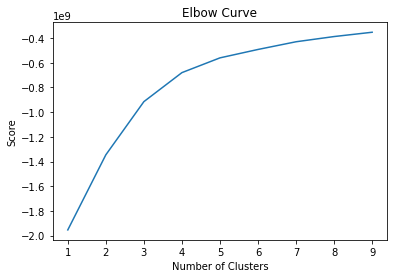

In [40]:
# Plot our elbow curve

pl.plot(num_cl,score_1)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

Curve flattens at 5, so we need 5 clusters

In [49]:
# Fit K-means object into our transformed data
k_means.fit(score_pca_1)

D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=5, n_jobs=-1)

In [50]:
# Create columnn for clsuters
df_prepped_2['clusters'] = k_means.fit_predict(score_pca_1)

D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
<ipython-input-50-00b62b2bd15b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_prepped_2['clusters'] = k_means.fit_predict(score_pca_1)


In [43]:
df_prepped_2.head()

,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,clusters
0,149,1,9,6,365,2
1,225,1,45,2,355,2
2,150,3,112,1,365,2
3,89,1,270,1,194,2
4,80,10,9,1,112,0


In [51]:
df_prepped['clusters'].value_counts(dropna = False)

KeyError: 'clusters'

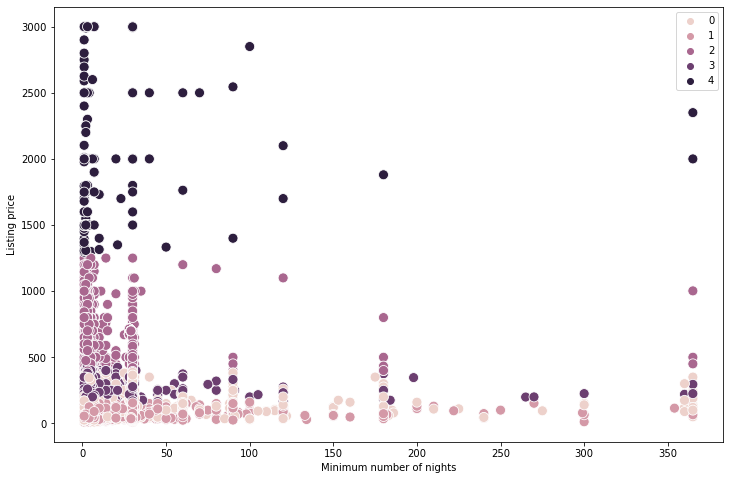

In [52]:
# Plot clusters for 'minimum_nights' and 'price'
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_prepped_2['minimum_nights'], y = df_prepped_2['price'], hue=k_means.labels_, s = 100)

ax.grid(False)
plt.xlabel('Minimum number of nights')
plt.ylabel('Listing price')
plt.show()

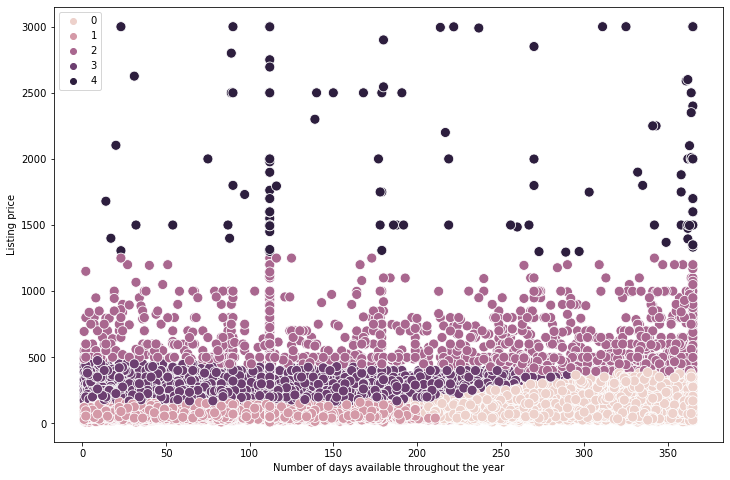

In [53]:
# Plot clusters for 'availability' and 'price'
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_prepped_2['availability_365'], y =df_prepped_2['price'], hue=k_means.labels_, s = 100)

ax.grid(False)
plt.xlabel('Number of days available throughout the year')
plt.ylabel('Listing price')
plt.show()

From this scatterplot I can see that there are listings from all price ranges available for a number of days throughout the year. So we can see that availability doesn't play much a role in affecting the price.

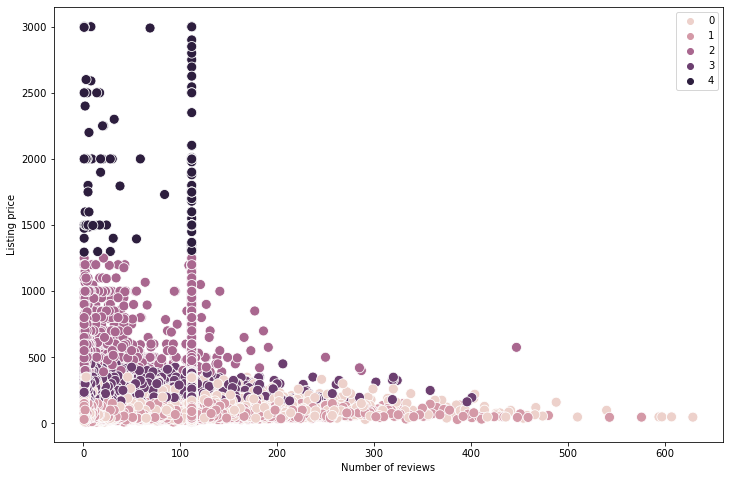

In [54]:
# Plot clusters for 'number_of_reviews' and 'price'
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_prepped_2['number_of_reviews'], y =df_prepped_2['price'], hue=k_means.labels_, s = 100)

ax.grid(False)
plt.xlabel('Number of reviews')
plt.ylabel('Listing price')
plt.show()

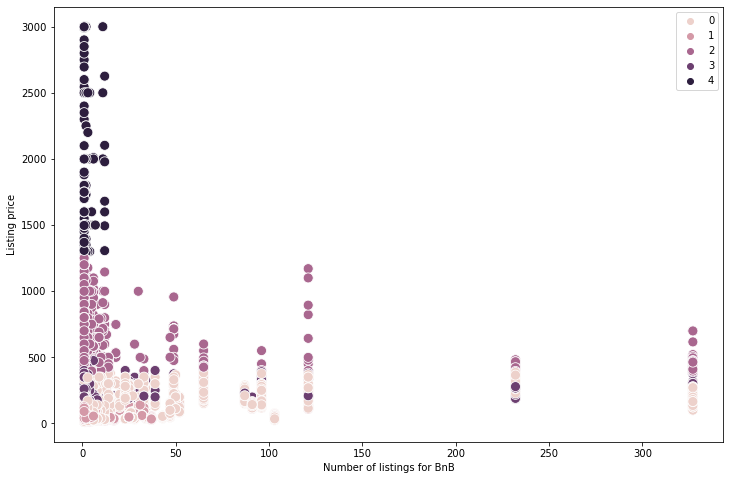

In [55]:
# Plot clusters for 'calculated_host_listings_count' and 'price'
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_prepped_2['calculated_host_listings_count'], y =df_prepped_2['price'], hue=k_means.labels_, s = 100)

ax.grid(False)
plt.xlabel('Number of listings for BnB')
plt.ylabel('Listing price')
plt.show()

In [56]:
plt.show(ax)

As we can see in this scatterplot, the cluster '2' which has a high listing price has very few listing counts.And the clusters with a lower price (<= 500) have higher listing counts than cluser 2. This supports my hypothesis that the higher the listing count, the lower the price will be. BUT, cluster 1 has low prices and low listing counts. But, they have a higher listing count than cluster 2. So my hypthesis that the higher the listing count, the lower the price will be is still supported. 

In [96]:
df_prepped_2.groupby('clusters').agg({'price':['mean','median'],
                                  'minimum_nights':['mean','median'],  
                                  'number_of_reviews':['mean','median'],
                                  'calculated_host_listings_count':['mean','median'],
                                  'availability_365':['mean','median']})

price        minimum_nights        number_of_reviews         \
                 mean median           mean median              mean median   
clusters                                                                      
0          615.138732    550       7.452605      3         52.363465     26   
1           88.538647     85       5.279112      2         41.926502     14   
2         1948.134752   1899      18.290780      2         71.645390    112   
3          128.516615    110      10.997463      3         57.484485     32   
4          239.893096    220       5.582083      3         42.781690     15   

         calculated_host_listings_count        availability_365         
                                   mean median             mean median  
clusters                                                                
0                             17.667922      1       218.095417    233  
1                              1.977455      1        95.049938    112  
2                              2.609929      1       211.056738    179  
3                             18.367042      2       310.377103    322  
4                              5.862387      1       102.338836    112

In [57]:
df_prepped_2.to_excel(os.path.join(path, '02 Data','Prepared Data','cluster_graph.xlsx'))